### Keras Examples
   #### Dense Model 

In [1]:

from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD 

In [2]:

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [9]:
model = keras.Sequential([
        keras.Input(shape=(28,28,1),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # layer 1-convolution 
        layers.MaxPooling2D(pool_size=(2, 2)),  # layer 2 - max pool
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # layer3 - convolution
        layers.MaxPooling2D(pool_size=(2, 2)), # layer 4 - max pooling 
        layers.Flatten(),
        layers.Dropout(0.5), # layer 5 drop out 
        layers.Dense(10, activation="softmax")) #layer 6 dense layer 
])
        
                    

SyntaxError: positional argument follows keyword argument (<ipython-input-9-3191c6b89dd2>, line 3)

In [1]:
'''Trains a simple Linear Regressin on a simulated data
'''

from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD 


batch_size = 10
epochs = 20

def SimulData():
	# Simulate some data for training 
	x_train = np.arange(0,10, 0.25 ) 
	x_train = x_train + 1.0/3.0 * np.random.randn(x_train.size);
	y_train  = np.cos( x_train  * np.pi /7) +  0.1 * np.random.randn(x_train.size);

	x_test = np.arange(0,10, 0.5 ) 
	x_test = x_test + 1.0/3.0 * np.random.randn(x_test.size);
	y_test  = np.cos( x_test  * np.pi /7)+  0.1 * np.random.randn(x_test.size) 

	return (x_train,y_train) , (x_test, y_test)


# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = SimulData(); 

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



40 train samples
20 test samples


In [2]:

model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


model.compile(loss='mse',
              optimizer=sgd,
              metrics=['mse'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
4/4 [==============================] - 0s 57ms/step - loss: 0.4870 - mse: 0.4870 - val_loss: 0.3620 - val_mse: 0.3620
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 0.2820 - mse: 0.2820 - val_loss: 0.3179 - val_mse: 0.3179
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 0.3373 - mse: 0.3373 - val_loss: 0.2863 - val_mse: 0.2863
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 0.2546 - mse: 0.2546 - val_loss: 0.2380 - val_mse: 0.2380
Epoch 5/20
4/4 [==============================] - 0s 8ms/step - loss: 0.1914 - mse: 0.1914 - val_loss: 0.2116 - val_mse: 0.2116
Epoch 6/20
4/4

Test loss: 0.15164628624916077


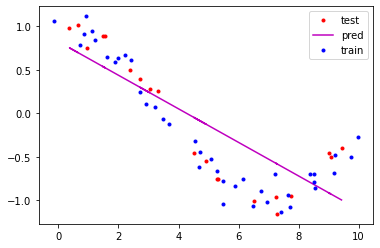

In [3]:
y_pred = model.predict(x_test); 


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

tst = plt.plot(x_test,y_test,'r.',label='test'); 
pred = plt.plot(x_test,y_pred,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

plt.legend()
plt.show()

##### Logistic Regression 
This part load the MNIST data and trains a simple logistic 
regression classifier


In [4]:
'''Keras MNIST MLP Example 
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_shape=(784,)))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5996 - accuracy: 0.8502 - val_loss: 0.3438 - val_accuracy: 0.9083
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.9080 - val_loss: 0.2992 - val_accuracy: 0.9177
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.9155 - val_loss: 0.2861 - val_accuracy: 0.9194
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2880 - accuracy: 0.9193 - val_loss: 0.2784 - val_accuracy: 0.9240
Epoch 5/10
469/469 [===================

#### TODO
1. train a 2/3 layer network 
2. Find the following hyperparameters on a validation data
    - number of neurons in a layer
    - effect of drop out
    
3. Plot the learning curves of these models
    - both training and validation learning curve
    
    

In [19]:
def Model(x_train, y_train,x_test, y_test, batch_size, epochs, l, r):
    model = Sequential()
    
    model.add(Dense(50, activation='relu', input_shape=(784,)))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='linear'))
  #  model.summary()
    
    # Set up the model algorithm, loss, optimizer 
    model.compile(loss=l, optimizer=r, metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size, epochs, validation_data=(x_test, y_test))
    
    # perform prediction using the test data
    y_pred = model.predict(x_test);
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
   # print("Test loss: ", model.evaluate(x_test, y_test))

    tst = plt.plot(x_test,y_test,'r.',label='test'); 
    pred = plt.plot(x_test,y_pred,'m',label='pred');
    tr = plt.plot(x_train,y_train,'b.',label='train');
    plt.legend()
    plt.show()
    
    
    return y_pred

In [20]:
y_pred_1 = Model(x_train, y_train, x_test, y_test, 128, 100, 'categorical_crossentropy', RMSprop())

Epoch 1/100


ValueError: in user code:

    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Sachin Kumar Jha\.conda\envs\sachin\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10) and (None, 1) are incompatible


In [5]:
SGD(lr = 0.01)   optimizer=RMSprop()
loss='categorical_crossentropy', 'mse'
batch_size = 128

model_1 = Sequential()

model_1.add(Dense(50, activation='relu', input_shape=(784,)))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.summary()

model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])


# here we have used relu activation in the hidden layer with 50 neurons on 1st layer and 20 nurons on 2nd layer
# by which we got 97 % accuracy with 9.5% loss

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4465 - accuracy: 0.8759 - val_loss: 0.2347 - val_accuracy: 0.9311
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2001 - accuracy: 0.9413 - val_loss: 0.1657 - val_accuracy: 0.9509
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1523 - accuracy: 0.9

In [6]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


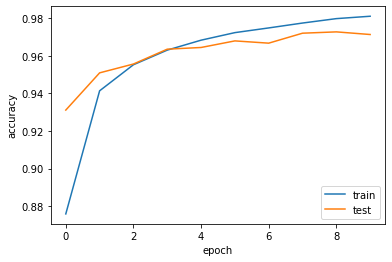

In [7]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()


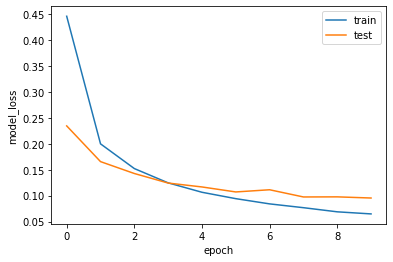

In [8]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.ylabel('model_loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')
plt.show()


# dropout

In [9]:
model_2 = Sequential()

model_2.add(Dense(50, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.25))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                39250     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7844 - accuracy: 0.7536 - val_loss: 0.27

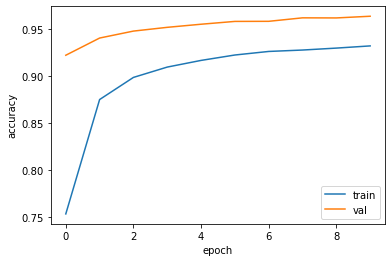

In [10]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'lower right')
plt.show()


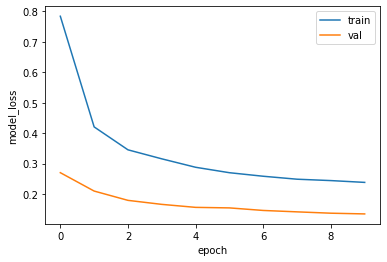

In [11]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylabel('model_loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper right')
plt.show()
